# Assignment 10 - Program 1

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

1. The data file for this project is available from the Seaborn website. To load this data into a DataFrame,
run this code:
data = sns.load_dataset('diamonds') 


In [3]:
diamonds = sns.load_dataset('diamonds')

2. Display the first five rows of data.

In [4]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


3. Use a condensed heatmap to identify correlations for the price column. Sort the results, include
annotations that format the values with three decimal places, and remove the color bar.

<Axes: >

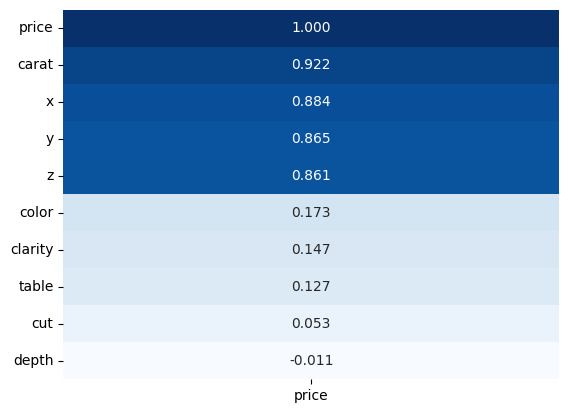

In [13]:
diamonds['price'] = pd.to_numeric(diamonds['price'], downcast='float')

diamonds['cut'] = diamonds['cut'].astype('category').cat.codes
diamonds['color'] = diamonds['color'].astype('category').cat.codes
diamonds['clarity'] = diamonds['clarity'].astype('category').cat.codes

sns.heatmap(diamonds.corr()[['price']].sort_values('price', ascending=False), annot=True, cmap='Blues', fmt=f'.3f', cbar=False)

4. Use the column with the strongest correlation to split the data into test and training datasets, where the
test dataset consists of 30% of the total dataset. Be sure to specify a value for the random_state
parameter

In [20]:
x_train, x_test, y_train, y_test = train_test_split(diamonds[['carat']], diamonds[['price']], test_size=0.33, random_state=45)

5. Create a LinearRegression object, and then fit the training dataset to the model

In [21]:
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

6. Score the model using the test dataset.

In [23]:
model_score = linearModel.score(x_test, y_test)
model_score

0.8528502074954241

7. Predict the y values based on the x values in the test dataset, and store the results in a variable.

In [25]:
y_predicted = linearModel.predict(x_test)
y_predicted

array([[  75.77774923],
       [ 307.95771488],
       [9440.36969725],
       ...,
       [ 230.564393  ],
       [ 849.71096807],
       [3171.51062461]])

8. Put the predicted values in a DataFrame

In [26]:
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

9. Join the y_test and predicted data with the x_test data, save the joined data in a new DataFrame, and
then display the first five rows of data

In [28]:
combined = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined.head(5)

,price_predicted,carat,price
0,75.777749,0.30,590.0
1,307.957715,0.33,868.0
2,9440.369697,1.51,14482.0
3,9827.336307,1.56,8858.0
4,6267.243500,1.10,4997.0


10. Melt the actual and predicted price columns together, assigning appropriate values to the variable and
value names.

In [29]:
melted = pd.melt(combined, id_vars=['carat'], value_vars=['price', 'price_predicted'], var_name='price_type', value_name='price_value')

11. Use a Seaborn line plot without a confidence interval to plot the predicted data

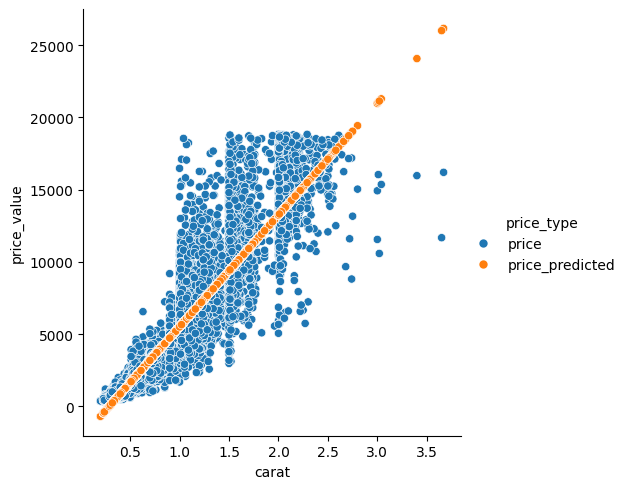

In [30]:
sns.relplot(data=melted, x='carat', y='price_value', hue='price_type')